- Use AAPL.csv dataset or dowload from link https://finance.yahoo.com/quote/AAPL/history?period1=1479081600&period2=1605312000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
### Requirement:
- Build a model to predict the tomorrow's **Open** value based on the today's **Open** value.
- Build a model to predict the tomorrow's **Open** value based on the today's **Open, High, Low, Close, Adj Close, Volume**

------------------------------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas_datareader as data

from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# LSTM for air pollution problem with regression framing
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


## **1. Model One To One**
- Build a model to predict the tomorrow's Open value based on the today's Open value.

In [ ]:
start = "2010-01-01"
end = "2022-08-19"

df = data.DataReader("AAPL", "yahoo", start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425


In [ ]:
df_test = df.tail(100)
df = df.iloc[:-100, :]

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425
...,...,...,...,...,...,...
2022-03-22,169.419998,164.910004,165.509995,168.820007,81532000.0,168.338501
2022-03-23,172.639999,167.649994,167.990005,170.210007,98062700.0,169.724533
2022-03-24,174.139999,170.210007,171.059998,174.070007,90131400.0,173.573532


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3081 entries, 2009-12-31 to 2022-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3081 non-null   float64
 1   Low        3081 non-null   float64
 2   Open       3081 non-null   float64
 3   Close      3081 non-null   float64
 4   Volume     3081 non-null   float64
 5   Adj Close  3081 non-null   float64
dtypes: float64(6)
memory usage: 168.5 KB


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3081.000000,3081.000000,3081.000000,3081.000000,3.081000e+03,3081.000000
mean,45.556242,44.606968,45.077227,45.102774,2.669345e+08,43.228602
std,41.902404,40.914421,41.395677,41.436910,2.250468e+08,41.833125
min,7.000000,6.794643,6.870357,6.858929,4.100000e+07,5.856372
25%,18.773930,18.464287,18.607143,18.612143,1.080380e+08,16.295809
50%,28.892500,28.330000,28.577499,28.580000,1.799940e+08,26.275400
75%,50.782501,49.807499,50.202499,50.375000,3.643444e+08,49.035667
max,182.940002,179.119995,182.630005,182.009995,1.880998e+09,181.259933


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df1 = df[['Close']]
df1

,Close
Date,
2009-12-31,7.526071
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
...,...
2022-03-22,168.820007
2022-03-23,170.210007
2022-03-24,174.070007


In [ ]:
df1.Close.dtype

dtype('float64')

In [ ]:
df1.describe()

,Close
count,3081.000000
mean,45.102774
std,41.436910
min,6.858929
25%,18.612143
50%,28.580000
75%,50.375000
max,182.009995


In [ ]:
df1.isnull().sum()

Close    0
dtype: int64

#### ***Data Nomalization***

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

df1_new = scaler.fit_transform(df1)

#### ***Split Data***

In [ ]:
df1_new.shape

(3081, 1)

In [ ]:
train_size = round(len(df1_new) * 75/100) 

train, test = df1_new[0:train_size, :], df1_new[train_size:, :]

In [ ]:
def create_dataset(dataset, look_back=1): 
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### ***Build Model***

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
trainX.shape

(2309, 1, 1)

In [ ]:
# create and fit the LSTM network
model1 = Sequential()
model1.add(LSTM(units = 128, return_sequences = True, input_shape = (1, look_back)))
model1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 256, return_sequences = True))
model1.add(Dropout(0.3))

# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 256, return_sequences = True))
model1.add(Dropout(0.3))

# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 256))
model1.add(Dropout(0.2))

# Adding the output layer
model1.add(Dense(units = 1))

model1.compile(loss='mean_squared_error', optimizer='adam')

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 256)            394240    
                                                                 
 dropout_1 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 256)            525312    
                                                                 
 dropout_2 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               5

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(min_delta = 0.0001, patience = 50, restore_best_weights = True)

In [ ]:
history = model1.fit(trainX, trainY, validation_data=(testX, testY), 
                    epochs=500, 
                    batch_size=128,
                    verbose=1,
                    callbacks = [early_stopping])

Epoch 1/500
19/19 [==============================] - 15s 181ms/step - loss: 0.0079 - val_loss: 0.2409
Epoch 2/500
19/19 [==============================] - 0s 23ms/step - loss: 0.0046 - val_loss: 0.2619
Epoch 3/500
19/19 [==============================] - 0s 27ms/step - loss: 0.0044 - val_loss: 0.2378
Epoch 4/500
19/19 [==============================] - 0s 24ms/step - loss: 0.0035 - val_loss: 0.0750
Epoch 5/500
19/19 [==============================] - 0s 24ms/step - loss: 4.4662e-04 - val_loss: 0.0034
Epoch 6/500
19/19 [==============================] - 0s 25ms/step - loss: 1.6699e-04 - val_loss: 0.0018
Epoch 7/500
19/19 [==============================] - 1s 28ms/step - loss: 8.7013e-05 - val_loss: 7.2718e-04
Epoch 8/500
19/19 [==============================] - 0s 23ms/step - loss: 7.6506e-05 - val_loss: 0.0013
Epoch 9/500
19/19 [==============================] - 0s 23ms/step - loss: 7.9444e-05 - val_loss: 2.5821e-04
Epoch 10/500
19/19 [==============================] - 0s 26ms/step - l

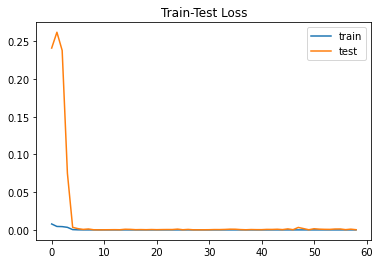

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Train-Test Loss')
plt.legend()
plt.show()

In [ ]:
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)

In [ ]:
trainX[:3]

array([[[0.00380895]],

       [[0.00447776]],

       [[0.00455321]]])

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainY[0][:5]

array([7.64321423, 7.65642881, 7.53464317, 7.52071381, 7.570714  ])

In [ ]:
trainPredict[:5]

array([[7.9274807],
       [8.042918 ],
       [8.055941 ],
       [7.935928 ],
       [7.922201 ]], dtype=float32)

### Evaluation

In [ ]:
# calculate root mean squared error
train_rmse = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f RMSE' % (train_rmse))
test_rmse = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f RMSE' % (test_rmse))


Train RMSE: 0.50 RMSE
Test RMSE: 2.81 RMSE


In [ ]:
df1.describe()

,Close
count,3081.000000
mean,45.102774
std,41.436910
min,6.858929
25%,18.612143
50%,28.580000
75%,50.375000
max,182.009995


In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df1_new)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1_new)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df1_new)-1, :] = testPredict


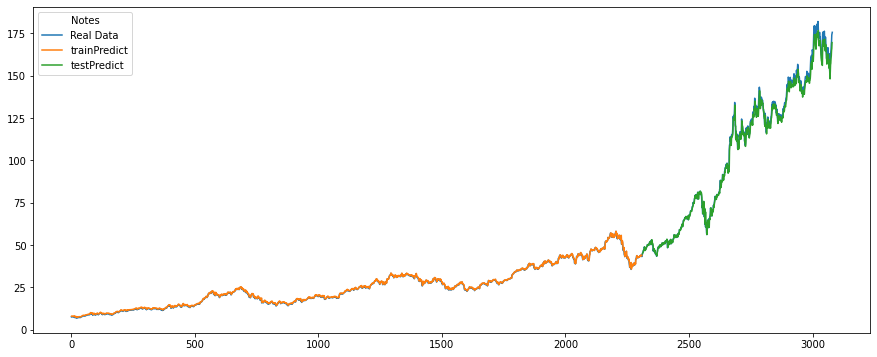

In [ ]:
%matplotlib inline

# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1_new), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()


### **Save model**

In [ ]:
model1.save('model/LSTM_one_to_one_LSTM.h5')

### **Dự đoán vài giá trị**

In [ ]:
df_test_new = df_test[['Close']]

In [ ]:
real_data = df_test_new['Close'].values

df_test_new['Predict_Close'] = [scaler.inverse_transform(model1.predict(np.reshape(scaler.transform([[real_data[0]]]), (1, 1, 1))))[0][0]]+[scaler.inverse_transform(model1.predict(np.reshape(scaler.transform([[i]]), (1, 1, 1))))[0][0] for i in real_data[1:]]

In [ ]:
df_test_new['error'] = df_test_new.Close - df_test_new.Predict_Close

In [ ]:
df_test_new

,Close,Predict_Close,error
Date,,,
2022-03-29,178.960007,173.909439,5.050568
2022-03-30,177.770004,172.847961,4.922043
2022-03-31,174.610001,170.019119,4.590881
2022-04-01,174.309998,169.749786,4.560211
2022-04-04,178.440002,173.445831,4.994171
...,...,...,...
2022-08-15,173.190002,168.743195,4.446808
2022-08-16,173.029999,168.599289,4.430710
2022-08-17,174.550003,169.965210,4.584793


In [ ]:
df1_close = df_test_new[['Predict_Close']]
df1_close = df1_close.set_index(df_test.index)

In [ ]:
x_new = scaler.inverse_transform(model1.predict(np.reshape(scaler.transform([[value]]), (1, 1, 1))))[0][0] # tomorrow close value
data_predict = pd.DataFrame(x_new, columns = ['Close'], index = datatime.datetime(2022, 8, 27))

df1_close = df1_close.append(data_predict)

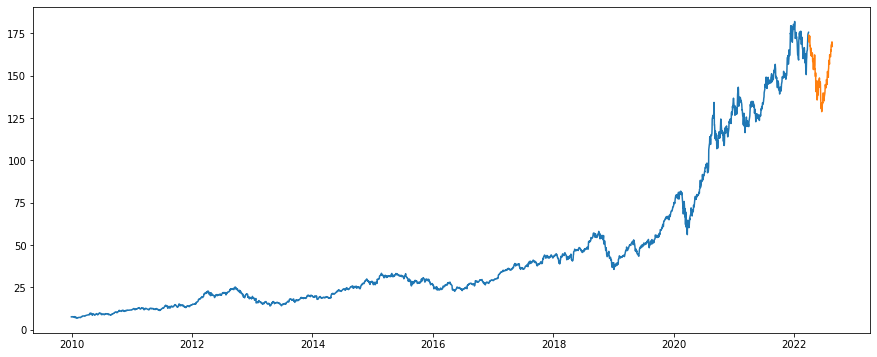

In [ ]:

# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(df[['Close']].iloc[:], label='Real Data')
plt.plot(df1_close, label='Predict')
# plt.plot(testPredictPlot, label='testPredict')
# plt.legend(title="Notes")
plt.show()

In [ ]:
value = 174 # today close value
scaler.inverse_transform(model1.predict(np.reshape(scaler.transform([[value]]), (1, 1, 1))))[0][0] # tomorrow close value

169.47137